**ĐỌC DỮ LIỆU VÀ XỬ LÍ DỮ LIỆU**

In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df_train = pd.read_csv('TSLA.csv')

In [ ]:
df_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
1,2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2,2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
3,2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
4,2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1990 non-null   object 
 1   Open       1990 non-null   float64
 2   High       1990 non-null   float64
 3   Low        1990 non-null   float64
 4   Close      1990 non-null   float64
 5   Adj Close  1990 non-null   float64
 6   Volume     1990 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 109.0+ KB


In [ ]:
df_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1.990000e+03
mean,87.893715,89.866597,85.723401,87.836593,87.836593,1.111116e+08
std,109.057310,111.570285,106.213808,108.908214,108.908214,8.053738e+07
min,9.488000,10.331333,9.403333,9.578000,9.578000,1.062000e+07
25%,16.151167,16.425499,15.879500,16.168167,16.168167,6.293512e+07
50%,21.635333,22.017333,21.286667,21.724334,21.724334,8.703090e+07
75%,184.833336,188.218330,179.980000,184.644996,184.644996,1.270292e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [ ]:
df_train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df_train.shape

(1990, 7)

In [ ]:
df_train.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df_train = df_train.set_index("Date")
df_train.index = pd.to_datetime(df_train.index)
df_train = df_train[["Close"]]
df_train.head()

# df_train = df_train.reshape(df_train.shape[0],1)

# df_train = df_train.loc[:,["Close"]].values
# # reshape
# df_train = df_train.reshape(df_train.shape[0],1)

# df_train.to_numpy()
# df_train = df_train.iloc[:, 1:7].values

,Close
Date,
2015-01-02,14.620667
2015-01-05,14.006000
2015-01-06,14.085333
2015-01-07,14.063333
2015-01-08,14.041333


**Hiển thị đồ thị Close price của cổ phiếu TSLA trong những năm qua**

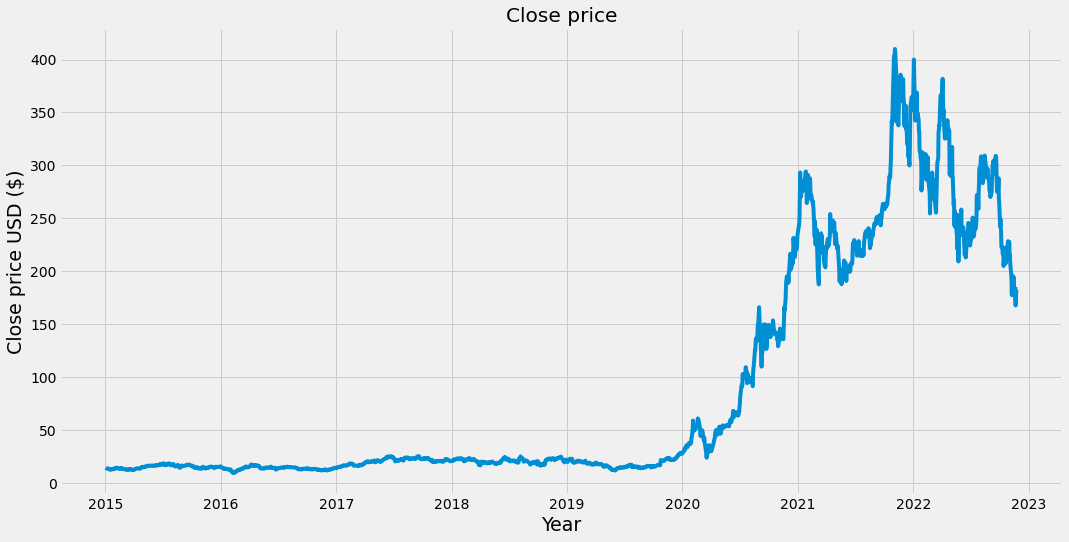

In [ ]:
plt.figure(figsize = (16,8))
plt.title("Close price")
plt.plot(df_train['Close'])
plt.xlabel('Year' , fontsize = 19)
plt.ylabel('Close price USD ($)', fontsize = 19)
plt.show()

**TRAINING**

In [ ]:
df_train.shape

(1990, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))
train_scaled = scaler.fit_transform(df_train)
print(train_scaled)

[[0.01259433]
 [0.01105916]
 [0.0112573 ]
 ...
 [0.40043758]
 [0.43363003]
 [0.43278088]]


**Reccurent Neural Network (RNN)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dropout

def RNN_model(window_size):
  regressor = Sequential()
  regressor.add(SimpleRNN(units = 50, return_sequences=True, input_shape = (window_size, 1)))
  regressor.add(SimpleRNN(units = 50, return_sequences=False))
  regressor.add(Dense(units=1))
  regressor.compile(optimizer ='adam', loss= 'mean_squared_error')
  return regressor

RNN = RNN_model(60)
RNN.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 60, 50)            2600      
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 50)                5050      
                                                                 
 dense_17 (Dense)            (None, 1)                 51        
                                                                 
Total params: 7,701
Trainable params: 7,701
Non-trainable params: 0
_________________________________________________________________


**MultiLayer Perceptron (MLP)**

In [ ]:
def MLP_model(window_size):
  regressor = Sequential()
  regressor.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(window_size, )))
  regressor.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
  regressor.add(Dense(1))
  regressor.compile(optimizer='adam', loss='mean_squared_error')
  return regressor

MLP = MLP_model(60)
MLP.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                610       
                                                                 
 dense_19 (Dense)            (None, 8)                 88        
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
Total params: 707
Trainable params: 707
Non-trainable params: 0
_________________________________________________________________


**Long Short Term Memory (LSTM)**

In [110]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTM

def LSTM_model(window_size):
  regressor = Sequential()
  regressor.add(LSTM(units=60, return_sequences=True, input_shape=(window_size, 1)))
  regressor.add(LSTM(units=60, return_sequences=False))
  regressor.add(Dense(1))
  regressor.compile(optimizer='adam', loss='mean_squared_error')
  return regressor

LSTM = LSTM_model(60)
LSTM.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 60, 60)            14880     
                                                                 
 lstm_23 (LSTM)              (None, 60)                29040     
                                                                 
 dense_10 (Dense)            (None, 1)                 61        
                                                                 
Total params: 43,981
Trainable params: 43,981
Non-trainable params: 0
_________________________________________________________________


**STOCK PRICE PREDICTION USING RNN**

In [ ]:
def convert_data(prediction_days_in_future, window_size):
    x = []
    y = []

    # Fetch 'WINDOW_SIZE' values as x and the value 'PREDICTION_TARGET' days later as y
    # Slide this window across all days to maximise values
    for i in range(window_size, len(df_train)-prediction_days_in_future):
        x.append(train_scaled[i-window_size:i, 0])
        y.append(train_scaled[i+prediction_days_in_future-1, 0])

    x = np.array(x).reshape(len(x), window_size, 1)
    y = np.array(y)
    
    train_size = 11
    n_training_samples = int(len(y) - train_size)
    X_train = x[:n_training_samples, :]
    y_train = y[:n_training_samples]
    X_test = x[n_training_samples:, :]
    y_test = y[n_training_samples:]
    
    return X_train, y_train, X_test, y_test, n_training_samples

def plot_results(train, output):
    plt.figure(figsize=(16,6))
    plt.title('Model')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train['Close'])
    plt.plot(output[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()

In [ ]:
from tensorflow.python import train
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_percentage_error
import time

def fit_model(days_in_future, window_size):
    print(f"Predicting for {days_in_future} days in future...")

    X_train, y_train, X_test, y_test, n_training_samples = convert_data(days_in_future, window_size)
    y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
    print("Train samples:", len(y_train), "Test samples:", len(y_test))
    
    model = RNN_model(window_size)
    start_time = time.time()
    model.fit(
        x=X_train,
        y=y_train,
        epochs=5,
        batch_size=64,
        validation_data=(X_test, y_test), 
        callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
    )
    print("Training time: %s seconds" % (time.time() - start_time))
    
    start_time = time.time()
    # Get the models predicted price values 
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    print("Testing time: %s seconds" % (time.time() - start_time))

    # Get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(((predictions - y_test_original) ** 2)))
    print("RMSE:", rmse)
    
    # Mean absolute percentage error
    mape = mean_absolute_percentage_error(y_test_original, predictions)
    print("Mean Absolute Percentage Error:", mape)
    
    # Final prediction error
    error = (np.abs(predictions[-1] - y_test_original[-1]) / y_test_original[-1])[0]
    print("Final Prediction Error:", error)
    
    # Plot results
    train = df_train[:n_training_samples+window_size+days_in_future-1]
    output = df_train[n_training_samples+window_size+days_in_future-1:-1]

    output['Predictions'] = predictions
    plot_results(train, output)

    output2 = df_train[n_training_samples+window_size+days_in_future-1:-1]
    plot_results(output2, output)


Predicting for 14 days in future...
Train samples: 1905 Test samples: 11
Epoch 1/5
30/30 [==============================] - 4s 43ms/step - loss: 0.0192 - val_loss: 0.0224
Epoch 2/5
30/30 [==============================] - 1s 31ms/step - loss: 0.0032 - val_loss: 0.0134
Epoch 3/5
30/30 [==============================] - 1s 32ms/step - loss: 0.0028 - val_loss: 0.0145
Epoch 4/5
30/30 [==============================] - 1s 31ms/step - loss: 0.0027 - val_loss: 0.0205
Epoch 5/5
30/30 [==============================] - 1s 32ms/step - loss: 0.0028 - val_loss: 0.0138
Training time: 7.458375930786133 seconds
1/1 [==============================] - 0s 256ms/step
Testing time: 0.3035726547241211 seconds
RMSE: 47.020049104740835
Mean Absolute Percentage Error: 0.24652568495999042
Final Prediction Error: 0.2824869157672189


<ipython-input-52-1bf467d98c44>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['Predictions'] = predictions


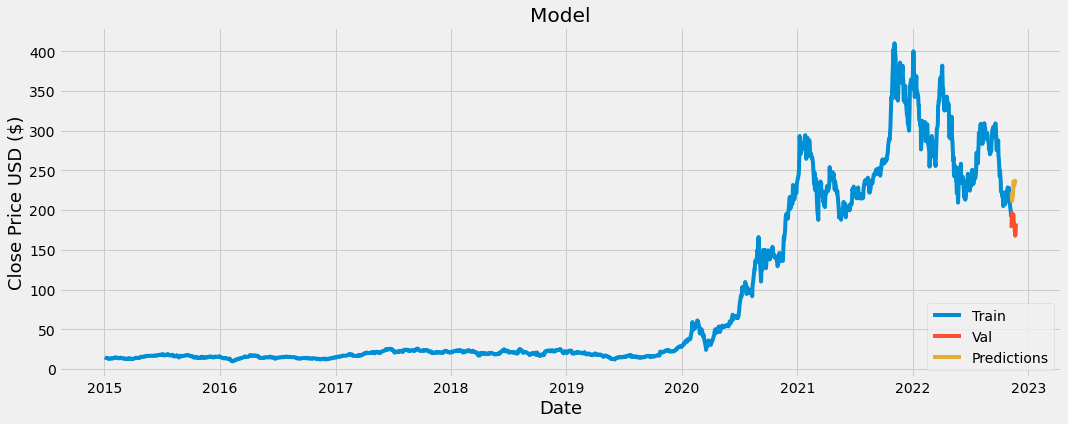

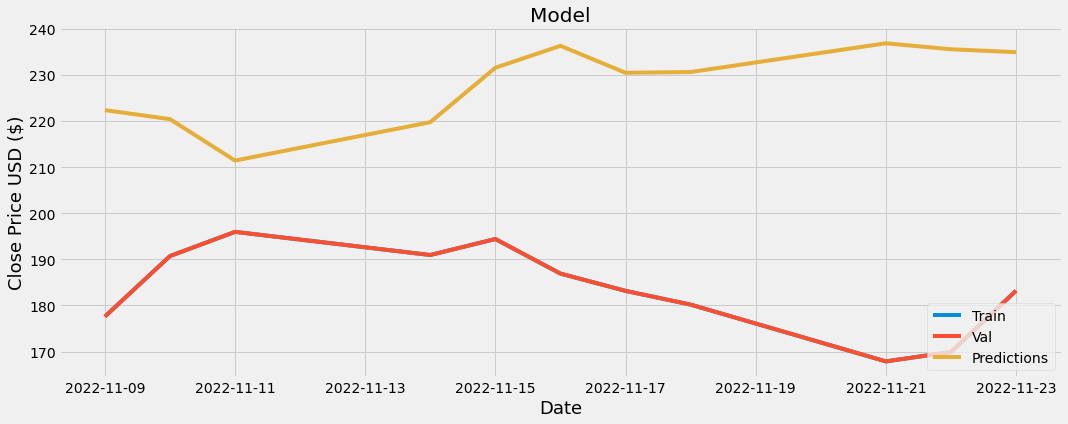

In [ ]:
fit_model(days_in_future=14, window_size=60)

In [ ]:
def convert_data(prediction_days_in_future, window_size):
    x = []
    y = []

    # Fetch 'WINDOW_SIZE' values as x and the value 'PREDICTION_TARGET' days later as y
    # Slide this window across all days to maximise values
    for i in range(window_size, len(df_train)-prediction_days_in_future):
        x.append(train_scaled[i-window_size:i, 0])
        y.append(train_scaled[i+prediction_days_in_future-1, 0])

    x = np.array(x).reshape(len(x), window_size, 1)
    y = np.array(y)
    
    train_size = 37
    n_training_samples = int(len(y) - train_size)
    X_train = x[:n_training_samples, :]
    y_train = y[:n_training_samples]
    X_test = x[n_training_samples:, :]
    y_test = y[n_training_samples:]
    
    return X_train, y_train, X_test, y_test, n_training_samples

def plot_results(train, output):
    plt.figure(figsize=(16,6))
    plt.title('Model')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train['Close'])
    plt.plot(output[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()

In [ ]:
from tensorflow.python import train
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_percentage_error
import time

def fit_model(days_in_future, window_size):
    print(f"Predicting for {days_in_future} days in future...")

    X_train, y_train, X_test, y_test, n_training_samples = convert_data(days_in_future, window_size)
    y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
    print("Train samples:", len(y_train), "Test samples:", len(y_test))
    
    model = RNN_model(window_size)
    start_time = time.time()
    model.fit(
        x=X_train,
        y=y_train,
        epochs=5,
        batch_size=64,
        validation_data=(X_test, y_test), 
        callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
    )
    print("Training time: %s seconds" % (time.time() - start_time))
    
    start_time = time.time()
    # Get the models predicted price values 
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    print("Testing time: %s seconds" % (time.time() - start_time))
    
    # Get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(((predictions - y_test_original) ** 2)))
    print("RMSE:", rmse)
    
    # Mean absolute percentage error
    mape = mean_absolute_percentage_error(y_test_original, predictions)
    print("Mean Absolute Percentage Error:", mape)
    
    # Final prediction error
    error = (np.abs(predictions[-1] - y_test_original[-1]) / y_test_original[-1])[0]
    print("Final Prediction Error:", error)
    
    # Plot results
    train = df_train[:n_training_samples+window_size+days_in_future-1]
    output = df_train[n_training_samples+window_size+days_in_future-1:-1]

    output['Predictions'] = predictions
    # plot_results(train, output)

    output2 = df_train[n_training_samples+window_size+days_in_future-1:-1]
    plot_results(output2, output)


Predicting for 49 days in future...
Train samples: 1844 Test samples: 37
Epoch 1/5
29/29 [==============================] - 5s 110ms/step - loss: 0.0434 - val_loss: 0.0437
Epoch 2/5
29/29 [==============================] - 2s 73ms/step - loss: 0.0055 - val_loss: 0.0591
Epoch 3/5
29/29 [==============================] - 3s 94ms/step - loss: 0.0048 - val_loss: 0.0494
Epoch 4/5
29/29 [==============================] - 1s 37ms/step - loss: 0.0045 - val_loss: 0.0231
Epoch 5/5
29/29 [==============================] - 1s 32ms/step - loss: 0.0045 - val_loss: 0.0332
Training time: 12.288248538970947 seconds
2/2 [==============================] - 0s 12ms/step
Testing time: 0.3405191898345947 seconds
RMSE: 72.91711304981665
Mean Absolute Percentage Error: 0.34724642991272614
Final Prediction Error: 0.5190139752725577


<ipython-input-55-171726da9c3e>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['Predictions'] = predictions


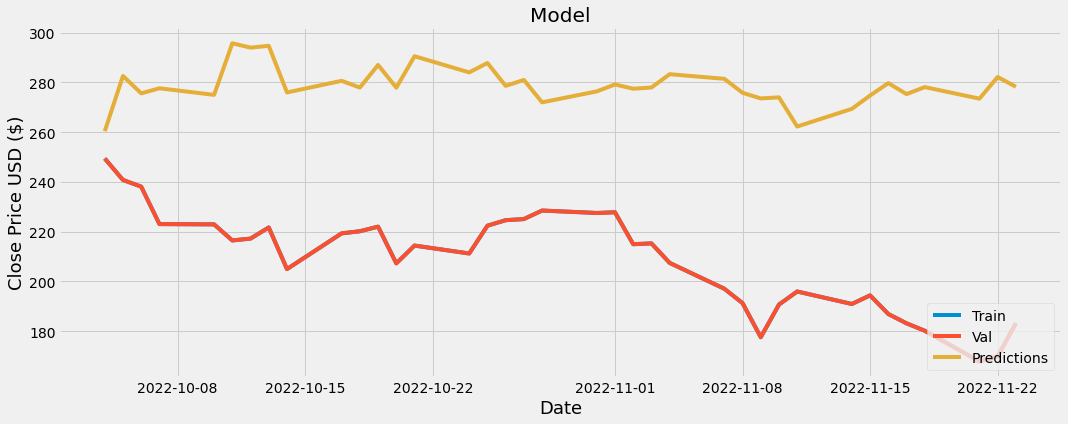

In [ ]:
fit_model(days_in_future=49, window_size=60)

**Không áp dụng phương pháp Overfitting**

**RNN MODEL**

In [ ]:
from tensorflow.python import train
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_percentage_error

def fit_model2(days_in_future, window_size):
    print(f"Predicting for {days_in_future} days in future...")

    X_train2, y_train2, X_test2, y_test2, n_training_samples = convert_data(days_in_future, window_size)
    y_test_original = scaler.inverse_transform(y_test2.reshape(-1, 1))
    print("Train samples:", len(y_train2), "Test samples:", len(y_test2))
    
    # Fit model
    model = RNN_model(window_size)
    model.fit(
        X_train2,
        y_train2,
        epochs=5,
        batch_size=64
    )
    
    # Get the models predicted price values 
    predictions = model.predict(X_test2)
    predictions = scaler.inverse_transform(predictions)
    
    # Get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(((predictions - y_test_original) ** 2)))
    print("RMSE:", rmse)
    
    # Mean absolute percentage error  
    mape = mean_absolute_percentage_error(y_test_original, predictions)
    print("Mean Absolute Percentage Error:", mape)
    
    # Final prediction error
    error = (np.abs(predictions[-1] - y_test_original[-1]) / y_test_original[-1])[0]
    print("Final Prediction Error:", error)
    
    # Plot results
    train = df_train[:n_training_samples+window_size+days_in_future-1]
    output = df_train[n_training_samples+window_size+days_in_future-1:-1]

    output['Predictions'] = predictions
    # plot_results(train, output)

    temp = df_train[n_training_samples+window_size+days_in_future-1:-1]
    plot_results(temp, output)


Predicting for 49 days in future...
Train samples: 1844 Test samples: 37
Epoch 1/5
29/29 [==============================] - 2s 31ms/step - loss: 0.0131
Epoch 2/5
29/29 [==============================] - 1s 31ms/step - loss: 0.0052
Epoch 3/5
29/29 [==============================] - 1s 30ms/step - loss: 0.0051
Epoch 4/5
29/29 [==============================] - 1s 30ms/step - loss: 0.0050
Epoch 5/5
2/2 [==============================] - 0s 13ms/step
RMSE: 76.42391187177236
Mean Absolute Percentage Error: 0.3651944396840178
Final Prediction Error: 0.52916473494001


<ipython-input-57-4fa47956c105>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['Predictions'] = predictions


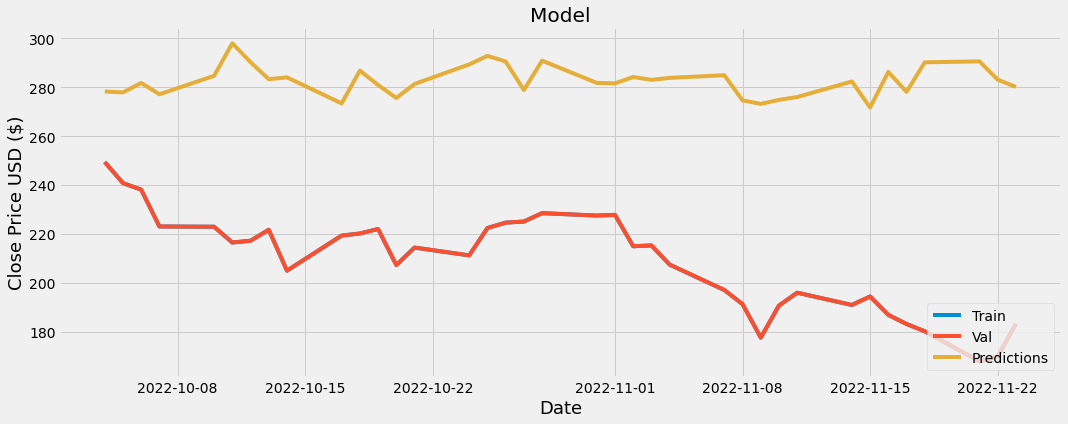

In [ ]:
fit_model2(days_in_future=49, window_size=60)

**MLP MODEL**

In [ ]:
from tensorflow.python import train
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_percentage_error

def fit_model3(days_in_future, window_size):
    print(f"Predicting for {days_in_future} days in future...")

    X_train, y_train, X_test, y_test, n_training_samples = convert_data(days_in_future, window_size)
    y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
    print("Train samples:", len(y_train), "Test samples:", len(y_test))
    
    model = MLP_model(window_size)
    model.fit(
        x=X_train,
        y=y_train,
        epochs=5,
        batch_size=64
    )
    
    # Get the models predicted price values 
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    
    # Get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(((predictions - y_test_original) ** 2)))
    print("RMSE:", rmse)
    
    # Mean absolute percentage error  
    mape = mean_absolute_percentage_error(y_test_original, predictions)
    print("Mean Absolute Percentage Error:", mape)
    
    # Final prediction error
    error = (np.abs(predictions[-1] - y_test_original[-1]) / y_test_original[-1])[0]
    print("Final Prediction Error:", error)
    
    # Plot results
    train = df_train[:n_training_samples+window_size+days_in_future-1]
    output = df_train[n_training_samples+window_size+days_in_future-1:-1]

    output['Predictions'] = predictions
    # plot_results(train, output)

    temp = df_train[n_training_samples+window_size+days_in_future-1:-1]
    plot_results(temp, output)

In [ ]:
fit_model3(days_in_future=49, window_size=60)

**STOCK PRICE PREDICTION USING MLP**

In [ ]:
from tensorflow.python import train
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_percentage_error
import time

def fit_model_MLP(days_in_future, window_size):
    print(f"Predicting for {days_in_future} days in future...")

    X_train, y_train, X_test, y_test, n_training_samples = convert_data(days_in_future, window_size)
    y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
    print("Train samples:", len(y_train), "Test samples:", len(y_test))
    
    model = MLP_model(window_size)
    start_time = time.time()
    model.fit(
        x=X_train,
        y=y_train,
        epochs=5,
        batch_size=64,
        validation_data=(X_test, y_test),
        callbacks=[EarlyStopping(monitor='val_loss', patience=3)] 
    )
    print("Training time: %s seconds" % (time.time() - start_time))
    
    start_time = time.time()
    # Get the models predicted price values 
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    print("Testing time: %s seconds" % (time.time() - start_time))
    
    # Get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(((predictions - y_test_original) ** 2)))
    print("RMSE:", rmse)
    
    # Mean absolute percentage error
    mape = mean_absolute_percentage_error(y_test_original, predictions)
    print("Mean Absolute Percentage Error:", mape)
    
    # Final prediction error
    error = (np.abs(predictions[-1] - y_test_original[-1]) / y_test_original[-1])[0]
    print("Final Prediction Error:", error)
    
    # Plot results
    train = df_train[:n_training_samples+window_size+days_in_future-1]
    output = df_train[n_training_samples+window_size+days_in_future-1:-1]

    output['Predictions'] = predictions
    # plot_results(train, output)

    output2 = df_train[n_training_samples+window_size+days_in_future-1:-1]
    plot_results(output2, output)

Predicting for 14 days in future...
Train samples: 1905 Test samples: 11
Epoch 1/5
30/30 [==============================] - 1s 6ms/step - loss: 0.0410 - val_loss: 0.0089
Epoch 2/5
30/30 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.0180
Epoch 3/5
30/30 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0142
Epoch 4/5
30/30 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0117
Training time: 0.9113662242889404 seconds
1/1 [==============================] - 0s 66ms/step
Testing time: 0.2652285099029541 seconds
RMSE: 43.35237592205368
Mean Absolute Percentage Error: 0.23298269069479477
Final Prediction Error: 0.22129925391494584


<ipython-input-63-618218f12654>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['Predictions'] = predictions


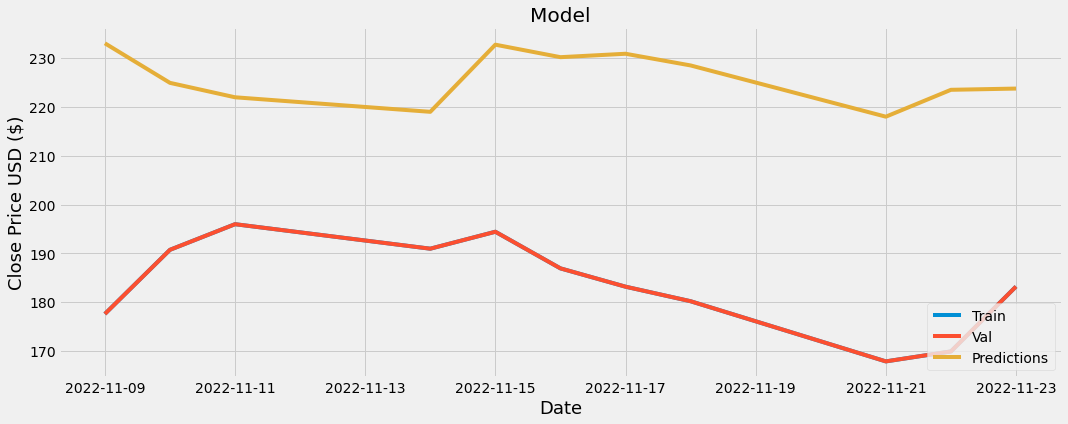

In [ ]:
fit_model_MLP(days_in_future=14, window_size=60)

Predicting for 49 days in future...
Train samples: 1844 Test samples: 37
Epoch 1/5
29/29 [==============================] - 1s 7ms/step - loss: 0.0163 - val_loss: 0.0271
Epoch 2/5
29/29 [==============================] - 0s 3ms/step - loss: 0.0088 - val_loss: 0.0477
Epoch 3/5
29/29 [==============================] - 0s 3ms/step - loss: 0.0084 - val_loss: 0.0480
Epoch 4/5
29/29 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0491
Training time: 0.891620397567749 seconds
2/2 [==============================] - 0s 6ms/step
Testing time: 0.26706957817077637 seconds
RMSE: 88.6998699213731
Mean Absolute Percentage Error: 0.41348085324498873
Final Prediction Error: 0.6690048757611163


<ipython-input-63-618218f12654>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['Predictions'] = predictions


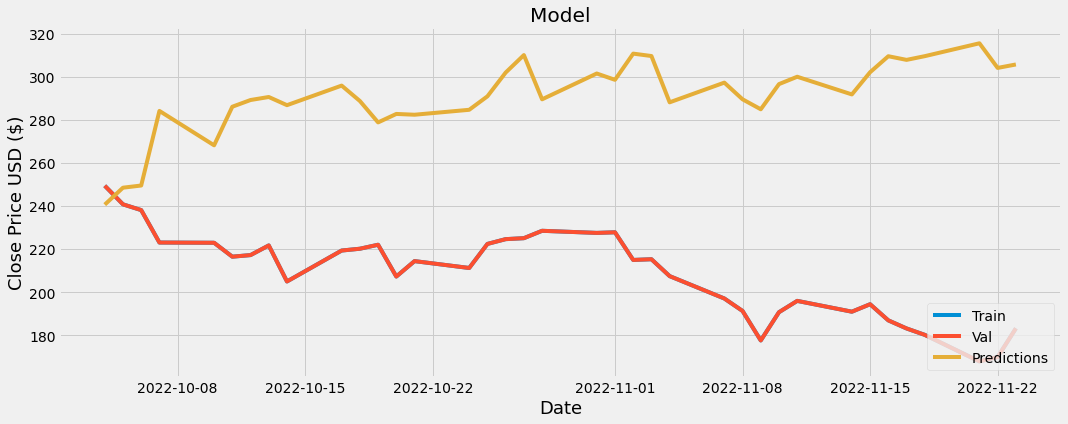

In [ ]:
fit_model_MLP(days_in_future=49, window_size=60)

**STOCK PRICE PREDICTION USING LSTM**

In [111]:
def convert_data(prediction_days_in_future, window_size):
    x = []
    y = []

    # Fetch 'WINDOW_SIZE' values as x and the value 'PREDICTION_TARGET' days later as y
    # Slide this window across all days to maximise values
    for i in range(window_size, len(df_train)-prediction_days_in_future):
        x.append(train_scaled[i-window_size:i, 0])
        y.append(train_scaled[i+prediction_days_in_future-1, 0])

    x = np.array(x).reshape(len(x), window_size, 1)
    y = np.array(y)
    
    train_size = 11
    n_training_samples = int(len(y) - train_size)
    X_train = x[:n_training_samples, :]
    y_train = y[:n_training_samples]
    X_test = x[n_training_samples:, :]
    y_test = y[n_training_samples:]
    
    return X_train, y_train, X_test, y_test, n_training_samples

def plot_results(train, output):
    plt.figure(figsize=(16,6))
    plt.title('Model')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train['Close'])
    plt.plot(output[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()

In [112]:
from tensorflow.python import train
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_percentage_error
import time 

def fit_model_LSTM(days_in_future, window_size):
    print(f"Predicting for {days_in_future} days in future...")

    X_train, y_train, X_test, y_test, n_training_samples = convert_data(days_in_future, window_size)
    y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
    print("Train samples:", len(y_train), "Test samples:", len(y_test))
    
    model = LSTM_model(window_size)
    start_time = time.time()
    model.fit(
        x=X_train,
        y=y_train,
        epochs=5,
        batch_size=64,
        validation_data=(X_test, y_test), 
        callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
    )
    print("Training time: %s seconds" % (time.time() - start_time))
    
    start_time = time.time()
    # Get the models predicted price values 
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    print("Testing time: %s seconds" % (time.time() - start_time))
    
    # Get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(((predictions - y_test_original) ** 2)))
    print("RMSE:", rmse)
    
    # Mean absolute percentage error
    mape = mean_absolute_percentage_error(y_test_original, predictions)
    print("Mean Absolute Percentage Error:", mape)
    
    # Final prediction error
    error = (np.abs(predictions[-1] - y_test_original[-1]) / y_test_original[-1])[0]
    print("Final Prediction Error:", error)
    
    # Plot results
    train = df_train[:n_training_samples+window_size+days_in_future-1]
    output = df_train[n_training_samples+window_size+days_in_future-1:-1]

    output['Predictions'] = predictions
    # plot_results(train, output)

    output2 = df_train[n_training_samples+window_size+days_in_future-1:-1]
    plot_results(output2, output)

In [113]:
fit_model_LSTM(days_in_future=14, window_size=60)

Predicting for 14 days in future...
Train samples: 1964 Test samples: 11


ValueError: ignored

**FEATURE QUAN TRỌNG ẢNH HƯỞNG ĐẾN OUTPUT DỰ ĐOÁN**

In [ ]:
df_train = pd.read_csv('TSLA.csv')

In [ ]:
corr = df_train.corr()
df_train.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999677,0.999525,0.999051,0.999051,-0.103155
High,0.999677,1.000000,0.999535,0.999568,0.999568,-0.098342
Low,0.999525,0.999535,1.000000,0.999616,0.999616,-0.108099
Close,0.999051,0.999568,0.999616,1.000000,1.000000,-0.102171
Adj Close,0.999051,0.999568,0.999616,1.000000,1.000000,-0.102171
Volume,-0.103155,-0.098342,-0.108099,-0.102171,-0.102171,1.000000


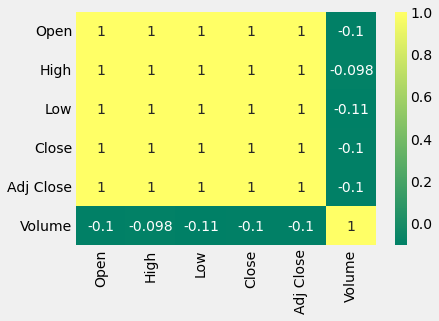

In [ ]:
import seaborn as sns

sns.heatmap(corr, annot=True, cmap='summer')

In [ ]:
corr['Close'].sort_values(ascending = False)

Close        1.000000
Adj Close    1.000000
Low          0.999616
High         0.999568
Open         0.999051
Volume      -0.102171
Name: Close, dtype: float64